In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from fastai.transforms import scale_min,scale_to
from keras.utils import to_categorical

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.layers import Dense,Conv2D,Flatten
from keras.models import Sequential
from keras.activations import relu,softmax
from keras.optimizers import Adam

In [29]:
from keras.layers import ZeroPadding2D
from keras.layers import MaxPooling2D

In [3]:
from scipy.io import loadmat
from IPython.display import Image

In [4]:
files = !ls ~/IISc/Data/allStatsMatFilesAfterVAD/*.mat

In [5]:
files[0]

'ls: /Users/nithin_rao/IISc/Data/allStatsMatFilesAfterVAD/*.mat: No such file or directory'

In [8]:
sz=108
num_classes=2

In [9]:
allFiles=[]
y=[]
for i in range(0,len(files)):
    
    aa=loadmat(files[i])['ststcsMtrx'];
    ab=cv2.resize(aa,(sz,sz))
    disease = files[i][-41:-38]
    if(disease=='ALS'):
        y.append(1);
    else:
        y.append(0);
        
    ab=np.reshape(ab,(sz,sz,1))
    allFiles.append(ab)

FileNotFoundError: [Errno 2] No such file or directory: 'ls: /Users/nithin_rao/IISc/Data/allStatsMatFilesAfterVAD/*.mat: No such file or directory.mat'

In [128]:
for i in range(0,len(allFiles)):
    print(np.shape(allFiles[i]))

(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)
(108, 108)


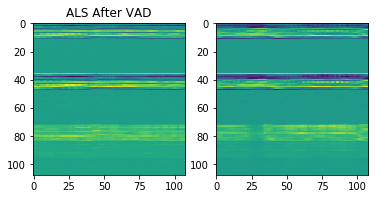

a


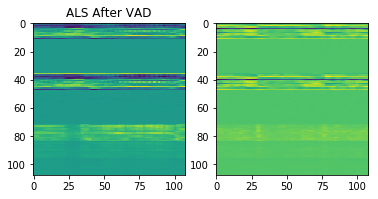

a


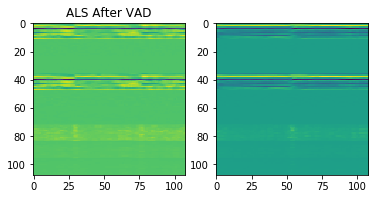

a


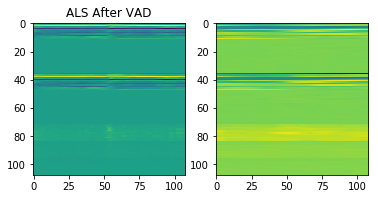

In [129]:

for i in range(0,4):
    plt.figure(10);
    plt.subplot(1,2,1);
    plt.imshow(allFiles[i]);
    plt.title('ALS After VAD');
    plt.subplot(1,2,2);
    plt.imshow(allFiles[i+1]);
    plt.show()
    input();

In [171]:
x=np.asarray(allFiles)

In [176]:
y=to_categorical(y,num_classes=num_classes)

In [172]:
np.shape(x)

(48, 108, 108, 1)

In [40]:
model = Sequential()

In [11]:
inputShape=(sz,sz,1)

In [12]:
inputShape

(108, 108, 1)

In [41]:
model.add(Conv2D(10,kernel_size=(3,3),padding='same',activation=relu,input_shape=inputShape))

In [42]:
model.add(MaxPooling2D((2,2)))

In [43]:
model.add(Conv2D(20,kernel_size=(3,3),padding='same',activation='relu'))

In [44]:
model.add(MaxPooling2D((2,2)))

In [45]:
model.add(Flatten())

In [46]:
model.add(Dense(50,activation=relu))

In [47]:
model.add(Dense(num_classes,activation=softmax))

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 108, 108, 10)      100       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 54, 54, 20)        1820      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 27, 27, 20)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 14580)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                729050    
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 102       
Total para

In [50]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(0.001),metrics=['accuracy'])

In [56]:
model.optimizer.lr.value()

<tf.Tensor 'Adam_1/lr/read:0' shape=() dtype=float32>

In [178]:
model.fit(x,y,batch_size=4,epochs=2,validation_split=0.2)

Train on 38 samples, validate on 10 samples
Epoch 1/2
38/38 [==============================] - 2s - loss: 7.2609 - acc: 0.5263 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/2
38/38 [==============================] - 1s - loss: 7.6349 - acc: 0.5263 - val_loss: 1.1921e-07 - val_acc: 1.0000


In [179]:
model.predict_classes(x)

48/48 [==============================] - 0s     


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])